In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [56]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [38]:
df.median()

battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.5
dtype: float64

In [59]:
df.std()

battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px_height         443.780811
px_width          432.199447
ram              1084.732044
sc_h                4.213245
sc_w                4.356398
talk_time           5.463955
three_g             0.426273
touch_screen        0.500116
wifi                0.500076
price_range         1.118314
dtype: float64

In [61]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

<Axes: >

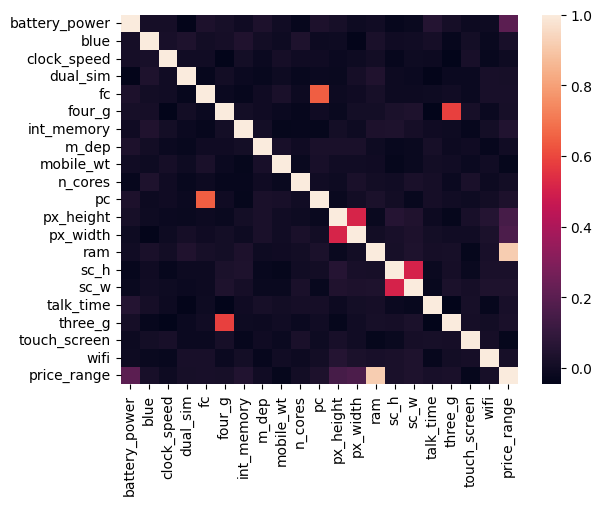

In [40]:
sns.heatmap(df.corr()) 
 

In [41]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='px_height', ylabel='Count'>

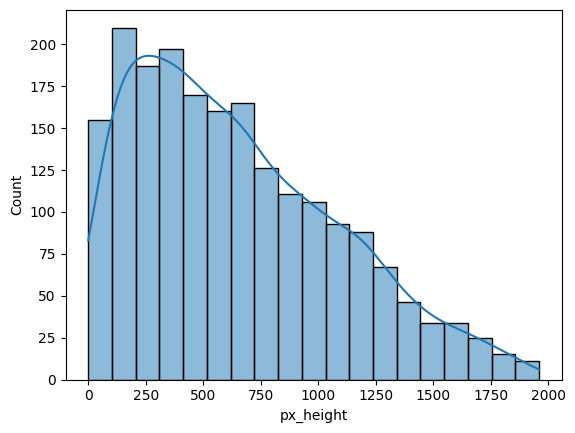

In [42]:
sns.histplot(data = df, x = "px_height", kde = True)

In [43]:
#CRIANDO UM ARRAY DE ARRAY
X = np.array(df['px_height'])
X = X.reshape(-1, 1)
X

array([[  20],
       [ 905],
       [1263],
       ...,
       [ 868],
       [ 336],
       [ 483]], dtype=int64)

In [44]:
y = df['px_width']
y


0        756
1       1988
2       1716
3       1786
4       1212
        ... 
1995    1890
1996    1965
1997    1632
1998     670
1999     754
Name: px_width, Length: 2000, dtype: int64

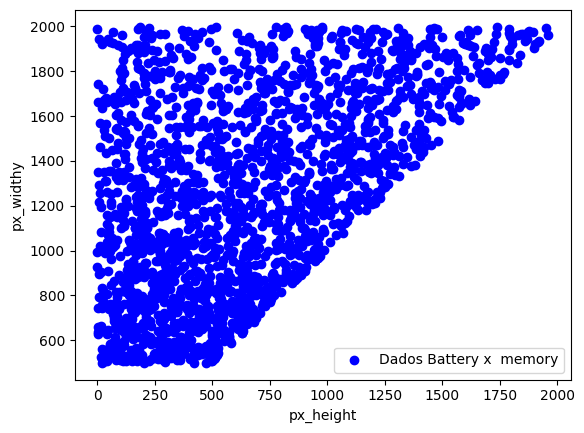

In [45]:
plt. scatter(X,y, color='blue', label="Dados Battery x  memory")
plt.xlabel("px_height")
plt.ylabel("px_widthy")
plt.legend()
plt.show()

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state= 42)

In [47]:
X_treino.shape

(1400, 1)

In [48]:
modelo = LinearRegression()

In [49]:
modelo.fit(X_treino, y_treino)

LinearRegression()

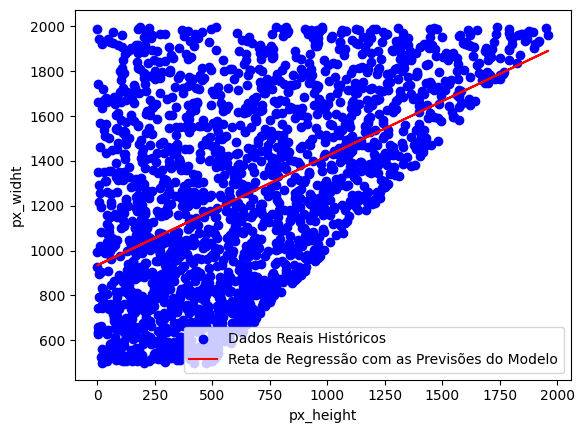

In [50]:
plt.scatter(X, y, color= "blue", label="Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label="Reta de Regressão com as Previsões de pixels")
plt.xlabel("px_height")
plt.ylabel("px_widht")
plt.legend()
plt.show()

In [51]:
score = modelo.score(X_teste, y_teste)
print(f'Coeficiente R^2: {score:.2f}')

Coeficiente R^2: 0.29


In [53]:
engine = np.array([[20]])

consumption = modelo.predict(engine)

print(f"Se você procurar um px_height {engine} o px_widht é {consumption}")

Se você procurar um px_height [[20]] o px_widht é [944.03946287]
